In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data_tracers = xr.open_mfdataset("asc_channel_tracers.nc")
data_velocities = xr.open_mfdataset("asc_channel_velocities.nc")



In [3]:
def initial_temperature(y, z):
    result = dT * (np.exp(z / h) - 1) + dT * 0 * y
    return result

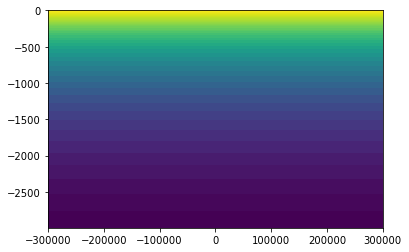

In [4]:
h=1000
Ly=600000
dT=5
T_initial = initial_temperature(data_tracers.yC,data_tracers.zC)
plt.pcolormesh(data_tracers.yC,data_tracers.zC,T_initial)


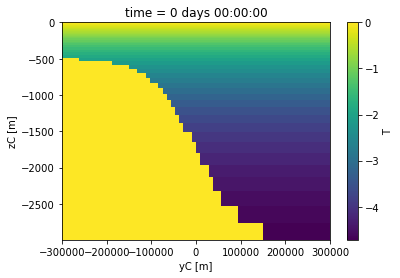

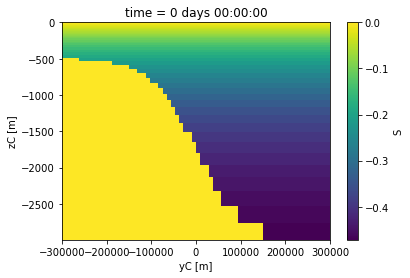

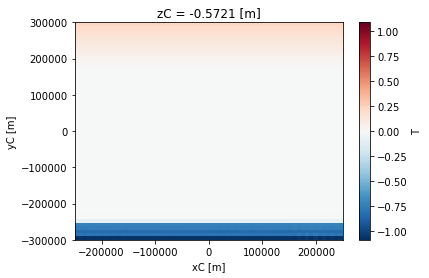

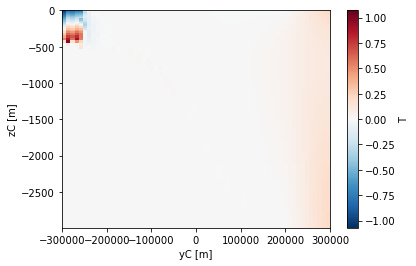

In [5]:
data_tracers.T.isel(time=0).mean('xC').plot()
plt.show()
data_tracers.S.isel(time=0).mean('xC').plot()
plt.show()
(data_tracers.T.isel(time=-1, zC=-1)-data_tracers.T.isel(time=0, zC=-1)).plot()
plt.show()
(data_tracers.T.isel(time=-1).mean('xC')-data_tracers.T.isel(time=0).mean('xC')).plot()
plt.show()

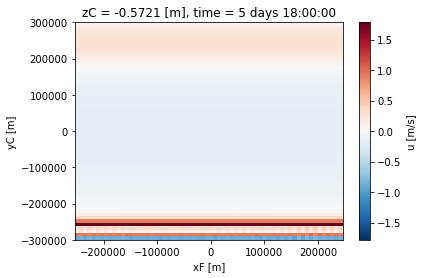

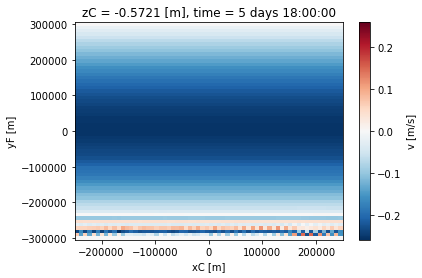

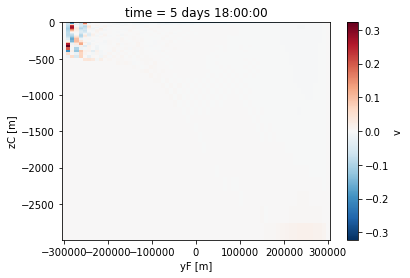

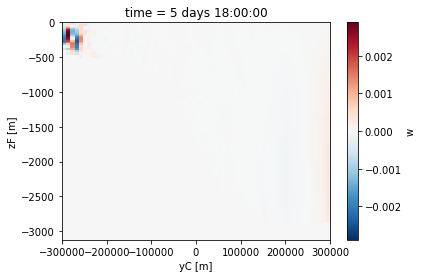

In [6]:
data_velocities.u.isel(time=-1).isel(zC=-1).plot()
plt.show()
data_velocities.v.isel(time=-1).isel(zC=-1).plot()
plt.show()


data_velocities.v.isel(time=-1).mean('xC').plot()
plt.show()
data_velocities.w.isel(time=-1).mean('xC').plot()
plt.show()



In [ ]:
file = jldopen("asc_channel_east_slice.jld2")

We load the "serialized" version of the grid from the output file. This returns an Oceananigans grid.

In [ ]:
grid = file["serialized/grid"]

In [ ]:
xc, yc, zc = nodes((Center, Center, Center), grid);

In [ ]:
fig, ax, hm = heatmap(yc / 1e3, zc / 1e3, file["timeseries/b/0"][1, :, :])
Colorbar(fig[1, 2], hm, label="buoyancy [m s⁻²]")
ax.xlabel = "longitude [km]"
ax.ylabel = "depth [m]"
fig